In [1]:
# Import the warnings module and ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Install and setup TA-Lib, a technical analysis library, with specific installation steps for compatibility
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4163    0  4163    0     0  14096      0 --:--:-- --:--:-- --:--:-- 14111
100  517k  100  517k    0     0   794k      0 --:--:-- --:--:-- --:--:--  794k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4079    0  4079    0     0  14182      0 --:--:-- --:--:-- --:--:-- 14163
100  392k  100  392k    0     0   588k      0 --:--:-- --:--:-- --:--:--  588k


In [10]:
# Commands to download, compile, and install TA-Lib from source
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
%cd ../
!pip install TA-Lib


--2024-07-26 09:26:24--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-26 09:26:24--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-26 09:26:24--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

In [1]:
# Install Zipline-reloaded, a Python library for backtesting trading algorithms
!pip install zipline-reloaded

  Using cached zipline_reloaded-3.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached alembic-1.13.2-py3-none-any.whl.metadata (7.4 kB)
  Using cached bcolz_zipline-1.2.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached Bottleneck-1.4.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached empyrical_reloaded-0.5.10-py3-none-any.whl.metadata (21 kB)
  Using cached intervaltree-3.1.0-py2.py3-none-any.whl
  Using cached iso3166-2.1.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached iso4217-1.12.20240625-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached lru_dict-1.3.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached python_interface-1.6.1-py3-none-any.whl
  Using cached exchange_calendars-4.5.5-py3-none-any.whl.metadata (37 kB)
  Using cached Ma

In [3]:
# Setup for plots to be displayed inline and import necessary libraries for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set the visual style of Seaborn (a visualization library) to 'whitegrid' for better readability of plots
sns.set_style('whitegrid')

In [5]:
# Load the Zipline extension to enable specific magic commands related to Zipline directly in Jupyter notebooks
%load_ext zipline

In [ ]:
# Mount Google Drive, load API keys for Quandl, and set up environment variables for API access
from google.colab import drive
import json

drive.mount('/content/drive')

# Read API key from file
with open('/content/drive/My Drive/ML4T/api_keys.json', 'r') as f:
    api_keys = json.load(f)
    QUANDL_API_KEY = api_keys['QUANDL_API_KEY']

# Set the environment variable
%env QUANDL_API_KEY=$QUANDL_API_KEY

In [7]:
# Ingest data bundles from Quandl to be used in backtesting
!zipline ingest -b quandl

[2024-07-26T09:32:41+0000-INFO][zipline.data.bundles.core]
 Ingesting quandl
[2024-07-26T09:32:41+0000-INFO][zipline.data.bundles.quandl]
[2024-07-26T09:32:58+0000-INFO][zipline.data.bundles.quandl]
 Parsing raw data.
[2024-07-26T09:33:33+0000-INFO][zipline.data.bundles.quandl]
 Generating asset metadata.
Merging daily equity files:  [--#---------------------------------]  1731/usr/local/lib/python3.10/dist-packages/zipline/data/bcolz_daily_bars.py:341: UserWarning: Ignoring 1 values because they are out of bounds for uint32:
             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
Merging daily equity files:  [####################################]      
[2024-07-26T09:35:22+0000-INFO][zipline.data.bundles.quandl]
 Parsing split data.
[2024-07-26T09:35:22+0000-INFO][zipline.data.bundles.quandl]
 Parsing dividend data.
[2024

In [11]:
%%zipline --start 2015-1-1 --end 2018-1-1 --output single_factor.pickle --no-benchmark --bundle quandl

# Import necessary libraries and Zipline modules for pipeline and trading functions
from zipline.api import (
    attach_pipeline, date_rules, time_rules, order_target_percent, pipeline_output,
    record, schedule_function, get_open_orders, calendars
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume
import numpy as np
import pandas as pd

# Define constants for the trading strategy
MONTH = 21  # Number of trading days in a month
YEAR = 12 * MONTH  # Number of trading days in a year
N_LONGS = N_SHORTS = 25  # Number of securities to long and short
VOL_SCREEN = 1000  # Minimum dollar volume threshold for screening stocks

class MeanReversion(CustomFactor):
    """ Custom Factor that calculates a z-score based on the ratio of the latest monthly return to the 12-month average,
        normalized by the standard deviation of monthly returns """
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        # Convert monthly returns into a DataFrame for easier manipulation
        df = pd.DataFrame(monthly_returns)
        # Calculate z-scores of the last month's returns relative to the historical mean and standard deviation
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())

def compute_factors():
    """ Setup the pipeline with MeanReversion factor and a volume filter """
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)  # 30-day average dollar volume
    return Pipeline(columns={
        'longs': mean_reversion.bottom(N_LONGS),  # Stocks to long
        'shorts': mean_reversion.top(N_SHORTS),  # Stocks to short
        'ranking': mean_reversion.rank(ascending=False)  # Ranking of stocks based on the factor
    }, screen=dollar_volume.top(VOL_SCREEN))  # Screen to filter out stocks below the dollar volume threshold

def exec_trades(data, assets, target_percent):
    """ Execute trades by setting the target portfolio percentage for each asset """
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):  # Check if the asset can be traded and if there are no open orders
            order_target_percent(asset, target_percent)  # Place the order

def rebalance(context, data):
    """ Rebalance the portfolio based on the pipeline output """
    factor_data = context.factor_data  # Get factor data from the pipeline
    record(factor_data=factor_data.ranking)  # Record factor rankings for analysis

    assets = factor_data.index  # All assets currently in the pipeline
    record(prices=data.current(assets, 'price'))  # Record current prices for all assets

    longs = assets[factor_data.longs]  # Assets to long
    shorts = assets[factor_data.shorts]  # Assets to short
    divest = set(context.portfolio.positions.keys()) - set(longs.union(shorts))  # Assets to sell

    exec_trades(data, assets=divest, target_percent=0)  # Sell assets not in longs or shorts
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS)  # Buy assets to long
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS)  # Short assets

def initialize(context):
    """ Initialize the trading algorithm with the defined pipeline and trading functions """
    attach_pipeline(compute_factors(), 'factor_pipeline')  # Attach the pipeline
    schedule_function(rebalance, date_rules.week_start(), time_rules.market_open(), calendar=calendars.US_EQUITIES)  # Schedule rebalancing
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))  # Set trading commissions
    context.set_slippage(slippage.VolumeShareSlippage())  # Set slippage model

def before_trading_start(context, data):
    """ Run the pipeline before the start of each trading day to update the factor data """
    context.factor_data = pipeline_output('factor_pipeline')  # Update the context with the latest pipeline output


,period_open,period_close,starting_value,ending_value,starting_cash,ending_cash,portfolio_value,returns,longs_count,shorts_count,...,period_label,algorithm_period_return,algo_volatility,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,factor_data,prices
2015-01-02 21:00:00+00:00,2015-01-02 14:31:00+00:00,2015-01-02 21:00:00+00:00,0.000,0.000,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,0,...,2015-01,0.000000,NaN,0.0,NaN,None,None,NaN,NaN,NaN
2015-01-05 21:00:00+00:00,2015-01-05 14:31:00+00:00,2015-01-05 21:00:00+00:00,0.000,0.000,1.000000e+07,1.000000e+07,1.000000e+07,0.000000,0,0,...,2015-01,0.000000,0.000000,0.0,0.0,None,None,NaN,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-06 21:00:00+00:00,2015-01-06 14:31:00+00:00,2015-01-06 21:00:00+00:00,0.000,3114262.860,1.000000e+07,6.881938e+06,9.996201e+06,-0.000380,12,4,...,2015-01,-0.000380,0.003482,0.0,0.0,None,None,-9.165151,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-07 21:00:00+00:00,2015-01-07 14:31:00+00:00,2015-01-07 21:00:00+00:00,3114262.860,3127113.440,6.881938e+06,6.881938e+06,1.000905e+07,0.001286,12,4,...,2015-01,0.000905,0.011564,0.0,0.0,None,None,4.933673,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-08 21:00:00+00:00,2015-01-08 14:31:00+00:00,2015-01-08 21:00:00+00:00,3127113.440,3190835.200,6.881938e+06,6.881938e+06,1.007277e+07,0.006366,12,4,...,2015-01,0.007277,0.044725,0.0,0.0,None,None,8.194658,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,685221.750,668261.720,1.035250e+07,1.035250e+07,1.102076e+07,-0.001537,12,10,...,2017-12,0.102076,0.090139,0.0,0.0,None,None,0.406793,Equity(0 [A]) 2393.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.66 Equity(1 [AA]) ...
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,668261.720,624763.750,1.035250e+07,1.035250e+07,1.097727e+07,-0.003947,12,10,...,2017-12,0.097727,0.090110,0.0,0.0,None,None,0.391704,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,624763.750,-1274086.885,1.035250e+07,1.229260e+07,1.101852e+07,0.003758,9,13,...,2017-12,0.101852,0.090074,0.0,0.0,None,None,0.405300,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,-1274086.885,-1191100.685,1.229260e+07,1.223516e+07,1.104406e+07,0.002318,9,12,...,2017-12,0.104406,0.090023,0.0,0.0,None,None,0.413599,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...


In [12]:
# Store the output of the last executed cell in a variable named 'result'
result = _

In [13]:
# Display information about the DataFrame to understand its structure and data types
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   starting_value           755 non-null    float64            
 3   ending_value             755 non-null    float64            
 4   starting_cash            755 non-null    float64            
 5   ending_cash              755 non-null    float64            
 6   portfolio_value          755 non-null    float64            
 7   returns                  755 non-null    float64            
 8   longs_count              755 non-null    int64              
 9   shorts_count             755 non-null    int64              
 10  long_value               755 non-null    float64 

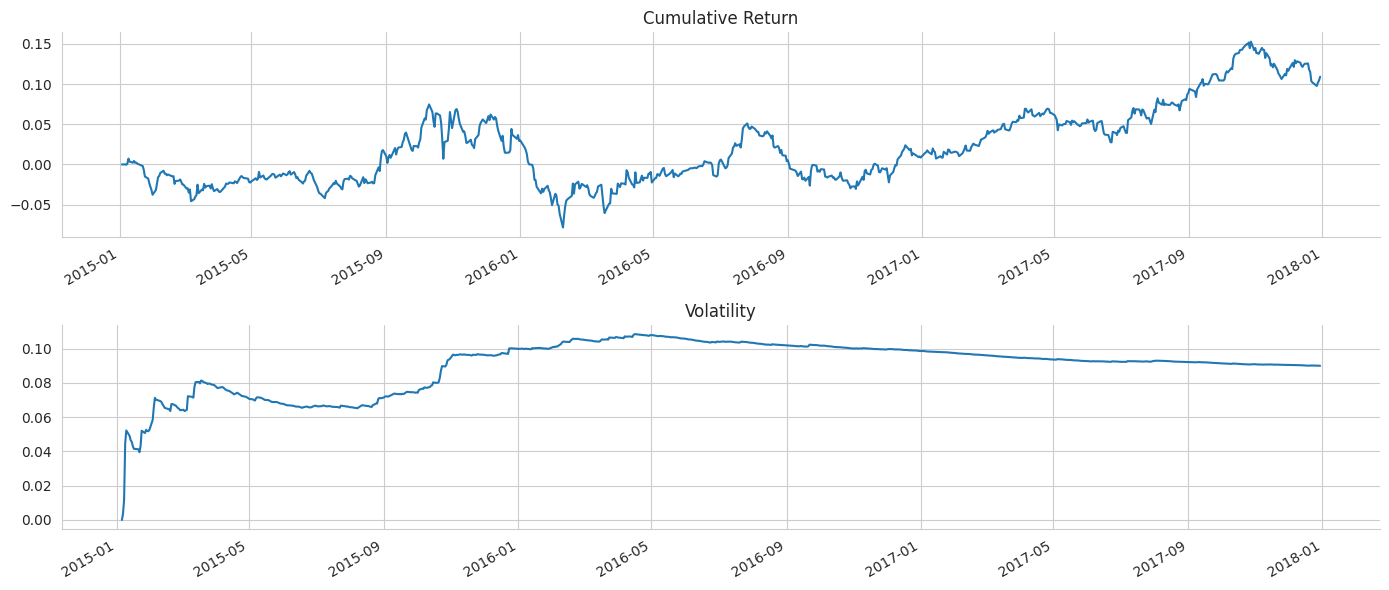

In [14]:
# Create subplots for cumulative returns and volatility
fig, axes = plt.subplots(nrows=2, figsize=(14,6))
# Plot the cumulative return on the first subplot
result.algorithm_period_return.plot(ax=axes[0], title='Cumulative Return')
# Plot the volatility on the second subplot
result.algo_volatility.plot(ax=axes[1], title='Volatility')
# Remove surrounding lines for better aesthetics
sns.despine()
# Ensure the plots do not overlap
fig.tight_layout();